# Исследование данных о продаже компьютерных игр.

Данное исследование посвящено изучению закономерностей, определяющих успешность продаж той или иной игры. Эта информация будет полезна для разработчиков компьютерных игр, а также для маркетинговых целей.

В наличии исторические данные о продажах игр в различных регионах, оценках пользователей и экспертов, а также жанрах и платформах. Данные представлены более чем за 30 лет: c 1980 по 2016 г.г.




***Оглавление***:

1 [Изучение общей информации](#paragraph1)

2 [Подготовка данных](#paragraph2)

3 [Исследовательский анализ данных](#paragraph3)

4 [Составляем портрет пользователя каждого региона](#paragraph4)

5 [Проверка гипотезы](#paragraph5)

6 [Общие выводы](#paragraph6)

## Изучение общей информации
<a name="paragraph1"></a>

In [ ]:
#загружаем необходимые библиотеки
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt

In [ ]:
#загружаем данные из файла в датафрейм
df=pd.read_csv('/datasets/games.csv')

In [ ]:
#смотрим первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#смотрим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
#смотрим статистические данные
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Наш датафрейм содержит 11 колонок со следующей информацией о каждой игре:платформа, год выпуска, жанра, продажи в Северной Америке, Европе и Японии и других странах (в миллионах проданных копий), оценка критиков (от 0 до 100), оценка пользователей (от 0 до 10) и рейтинг, указывающий на подходящую возрастную категорию. 

Есть данные о **16715** играх, собранные с 1980 по 2016 г.г. Но в некоторых столбцах содежится достаточно много пустых значений, которые мы будем обрабатывать в дальнейшем в исследовании.


## Подготовка данных
<a name="paragraph2"></a>

In [ ]:
#заменяем названия столбцов:приводим к нижнему регистру
df.columns=df.columns.str.lower()

In [ ]:
#оценим количество пропусков
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
#посмотрим уникальные значения в столбце user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [ ]:
df.query('user_score=="tbd"')['user_score'].count()


2424

Обратим внимание, что в столбце 'user_score' встречается также значение 'tbd', которое означает, что значение пока не проставлено. Изменим его на значение NaN, чтобы в дальнейшем мы могли поменять тип столбца.

In [ ]:
df['user_score']=df['user_score'].replace('tbd','nan')

Мы увидели небольшое количество пропусков в столбцах с названием и годом выпуска игры (0.01% и 1.6% соответственно). 
Заменить эти значения репрезентативными не видится возможным, поэтому данные пропуски мы удалим.


In [ ]:
#удаление пропусков в name и year_of_release
df=df.dropna(subset=['name'])
df=df.dropna(subset=['year_of_release'])


Для дальнейшей работы с данными заменим **тип данных** в столбце с годом выпуска игры с типа float на int. А также изменим данные в столбце 'оценка пользователей' c типа object на тип int. Чтобы в дальнейшем мы могли осуществлять с этими данными различные вычисления и преобразования. Заменить данные с оценками на int нам не позволяют пропуски в данных, но тип float также позволит выполнить все необходимые преобразования.

In [ ]:
#изменяем типы данных в столбцах year_of_release и user_score
df['year_of_release']=df['year_of_release'].astype('int')
df['user_score'] = df['user_score'].astype('float')

В столбцах с оценкой пользователей, оценкой критиков и рейтингом ESRB содержится наоборот очень много пропусков (до 51%). Эти данные удалять нельзя. Изучим подробнее данные с пропусками.

In [ ]:
#изучим отдельно данные с пропусками
df_nan=df[df.isna().any(axis=1)]
df_nan.shape

(9550, 12)

In [ ]:
df_nan.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,9550.000000,9550.000000,9550.000000,9550.000000,9550.000000,1089.000000,569.000000,9550.000000
mean,2005.767225,0.172400,0.081981,0.089041,0.022756,60.991736,6.423023,0.366178
std,6.727305,0.680809,0.307314,0.327347,0.085476,11.406144,1.960422,1.164586
min,1980.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,54.000000,5.300000,0.040000
50%,2008.000000,0.030000,0.000000,0.000000,0.000000,62.000000,7.000000,0.110000
75%,2010.000000,0.140000,0.050000,0.050000,0.020000,69.000000,7.900000,0.310000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,90.000000,9.700000,40.240000


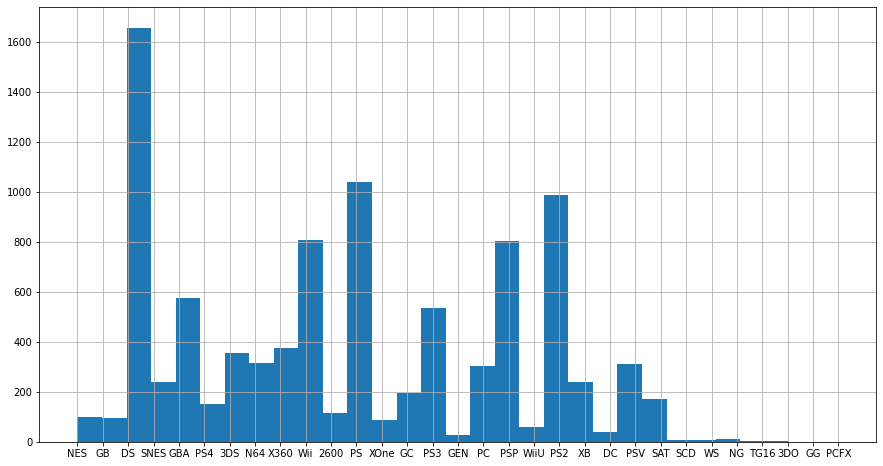

In [ ]:
df_nan['platform'].hist(bins=31,figsize=(15,8))
None

In [ ]:
df[df['critic_score'].isna() &df['user_score'].isna()&df['rating'].isna()].shape

(6580, 11)

В нашей таблице осталось достаточно большое количество данных без пропусков:9618 игр. Отметим, что большинство игр имеют одновременно пропуски в графах: оценка критиков, оценка пользователей и возрастной рейтинг (6580 игр). Игры с пропусками немного менее успешны, чем игры во всей совокупности:  количество проданных копий в Северной Америке и Европе у них меньше. Каких-то других особенностей у данных игр нет (год их выпуска в среднем такой же, как и по общей совокупности; игры были выпущены на различных платформах).

Данные пропуски могли возникнуть в силу разных причин: ошибки человека, которые заполнял,собирал данные, технические ошибки при сборе, хранении, передаче данных. Так как сразу многое количество игр содержит пропуска в оценках пользователей и критиков и в рейтинге, возможно, данные по этим категориям у данных игр не были изначально собраны.

Так как ESRB основана в 1994 году, а данные о играх с 1980 г., логично предположить, что часть пропусков в данных об возрастных ограничениях произошла из-за того, что этого рейтинга еще не было создано.

Чтобы не искажать статистические свойства выборки, а следовательно, результаты нашего исследования, оставим пропуски в столбцах 'оценка пользователей' и 'оценка критиков' без изменений. Это не помешает делать последующий анализ и не исказит данные.

Пропуски в столбце 'возрастной рейтинг' заменим на 'undefined'.

In [ ]:
df['rating']=df['rating'].fillna('underfined')

Для дальнейшего анализа данных посчитаем по каждой игре общую сумму продаж.

In [ ]:
#посчитаем суммарные продажи во всех регионах
df['all_sales']=df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Исследовательский анализ данных.
<a name="paragraph3"></a>

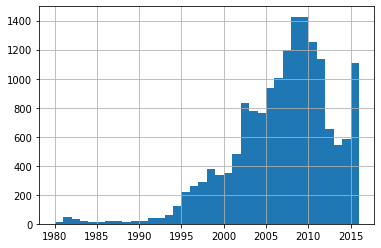

In [ ]:
#количество выпущенных игр по годам
df['year_of_release'].hist(bins=36)
None

In [ ]:
df.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

Обратим внимание, что до 1995 года количество выпущенных игр в год было очень небольшим: менее 200 игр.Далее начинается быстрый рост, который достигает своего пика в 2008 году:1427 игры. После 2009 года начинается постепенный спад в количестве. В 2015 году было выпущено 606 игр,что близко к уровню 2001 года. Данные по играм за 2016 г. неполные.

In [ ]:
#количество выпущенных игр по платформам
df.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','all_sales'],aggfunc=sum)\
.sort_values(by='all_sales',ascending=False)

,all_sales,eu_sales,jp_sales,na_sales
platform,,,,
PS2,1233.56,332.63,137.54,572.92
X360,961.24,268.32,12.30,595.74
PS3,931.34,327.21,79.41,390.13
Wii,891.18,258.32,68.28,486.87
DS,802.78,188.41,175.02,380.31
PS,727.58,212.39,139.78,334.72
PS4,314.14,141.09,15.96,108.74
GBA,312.88,74.59,46.56,184.12
PSP,289.53,65.62,75.88,107.27


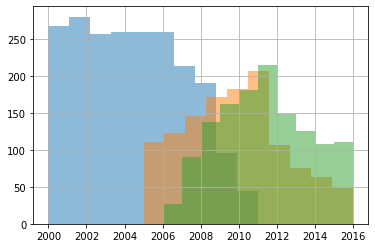

In [ ]:
#распределение по годам
df_PS2=df.query('platform=="PS2"')
df_X360=df.query('platform=="X360"')
df_PS3=df.query('platform=="PS3"')
df_PS2['year_of_release'].hist(alpha=0.5)
df_X360['year_of_release'].hist(alpha=0.5)
df_PS3['year_of_release'].hist(alpha=0.5)
None

Рекордсменами среди платформ стали PS2,PS3,X360. Суммарные продажи игр на этих платформах по всем регионам за весь период наблюдения были наиболее высокими. На каждой из них было продано около 1000 млн. копий. Если рассмотреть продажи с этих трех платформ по годам, то можно обратить внимание, что срок жизни каждой платформы около 10 лет. После середины этого срока продажи по платформам уменьшаются.

Используя эту информацию, для дальнейшего анализа возьмем данные за актуальный период: за последние 5 лет. Так мы определим платформы, продажи игр которых находятся или в состоянии роста или на своем пике.

In [ ]:
#возьмем данные за актуальный период
df_actualdate=df.query('year_of_release>2011')

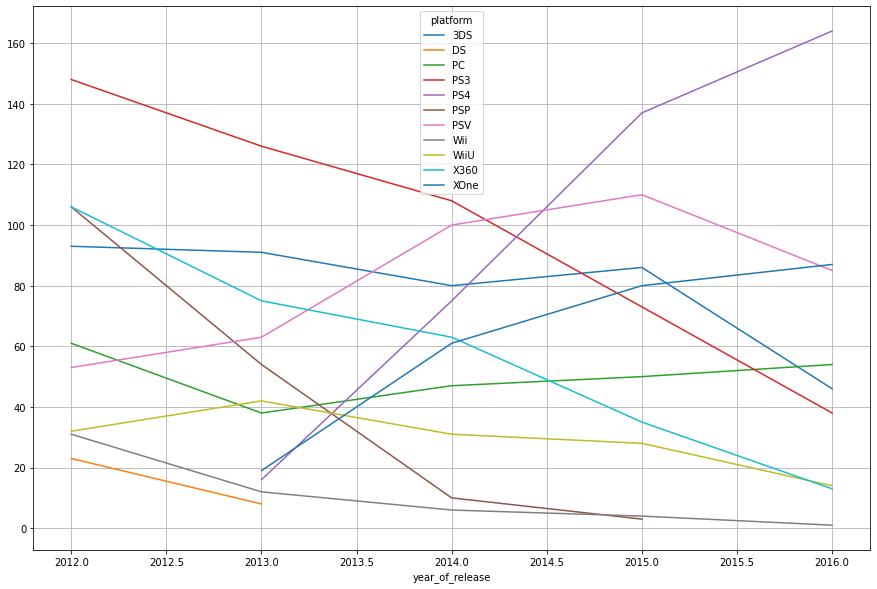

In [ ]:
#построим график продаж по платформам
df_actualdate.pivot_table(index='year_of_release',columns='platform',values='name',aggfunc='count')\
.plot(grid=True,figsize=(15,10))

None

С помощью графика мы видим, что платформы **XOne** и **PS4** находятся в стадии роста. Также растут продажи PC, но незначительно, и в 2013 г. был спад продаж игр на этой платформе. Все остальные платформы переживают спад продаж.

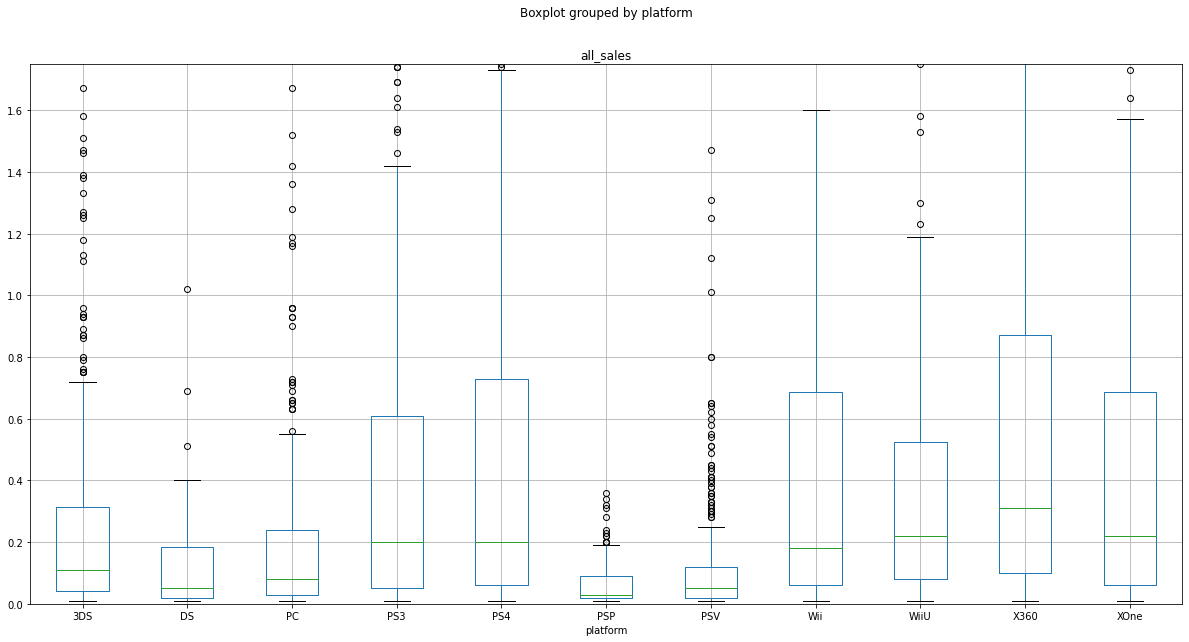

In [ ]:
#строим boxplot
df_actualdate.boxplot(column='all_sales',by='platform',figsize=(20,10))
plt.ylim(0,1.75)
None

С помощью графика boxplot мы можем сравнить характерные величины по каждой платформе. Средние общие продажи по всем регионам наиболее высокие у платформ PS3 и X360. Наименьшие продажи игр на платформах-DC,GC,PC (но были игры с этой платформы, которые были проданы в размере более 1.5 млн копий),PSV,XB. Наибольший размах в числе проданных копий разных игр у платформ 
GBA,PS4 и X360.

Проанализируем далее, есть ли связь между продажами и оценками критиков и пользователей. Возьмем одну из платформ с высокими продажами, которая на данный момент находится в росте: PS4.

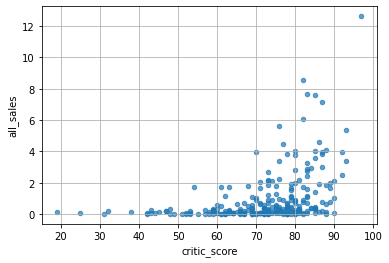

In [ ]:
#оценки критиков и продажи
df_actualdate.query('platform=="PS4"').plot(x='critic_score', y='all_sales',kind='scatter',grid=True,alpha=0.7) 
None

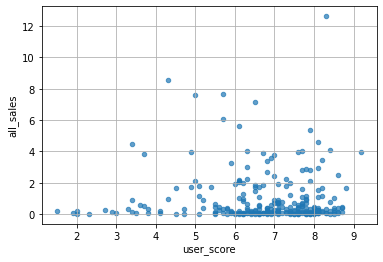

In [ ]:
#оценки пользователей и продажи
df_actualdate.query('platform=="PS4"').plot(x='user_score', y='all_sales',kind='scatter',grid=True,alpha=0.7) 
None

In [ ]:
df_PS4=df_actualdate.query('platform=="PS4"')
print(df_PS4['user_score'].corr(df_PS4['all_sales']))
print(df_PS4['critic_score'].corr(df_PS4['all_sales']))



-0.031957110204556376
0.40656790206178095


Мы получили умеренную корреляцию между оценками компьютерных игр критиками  и их успешностью. Связь между оценками пользователей и продажами игр или отсутствует, или носит нелинейный характер.

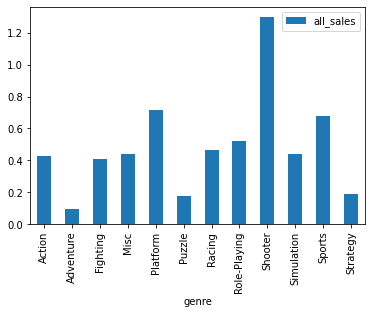

In [ ]:
df_actualdate.pivot_table(index='genre',values=['all_sales'],aggfunc='mean').plot(kind='bar')
None

На диаграмме отчетливо видна разница успешности продаж игр разных жанров. Наиболее популярными являются игры в стиле Shooter, Sports и Platform. Наименее популярная- Adventure.

##  Составляем портрет пользователя каждого региона.
<a name="paragraph4"></a>

In [ ]:
print('Доля продаж компьютерных игр в разных регионах составляет:')
print('в Северной Америке - ',round(df['na_sales'].sum()/df['all_sales'].sum()*100,1))
print('в Европе - ',round(df['eu_sales'].sum()/df['all_sales'].sum()*100,1))
print('в Японии - ',round(df['jp_sales'].sum()/df['all_sales'].sum()*100,1))
print('в других регионах - ',round(df['other_sales'].sum()/df['all_sales'].sum()*100,1))

Доля продаж компьютерных игр в разных регионах составляет:
в Северной Америке -  49.3
в Европе -  27.2
в Японии -  14.6
в других регионах -  8.9


Почти половина всех компьютерных игр в мире была продана в Северной Америке (49%), 27% в Европе и 15% в Японии. Продажи по регионам очень сильно различаются. Посмотрим, отличается ли покупательское поведение пользователей разных регионов.

In [ ]:
print(df.pivot_table(index='platform',values='na_sales',aggfunc=sum).sort_values(by='na_sales',ascending=False).head())
print(df.pivot_table(index='platform',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',ascending=False).head())
print(df.pivot_table(index='platform',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',ascending=False).head())
print(df.pivot_table(index='platform',values='other_sales',aggfunc=sum).sort_values(by='other_sales',ascending=False).head())

          na_sales
platform          
X360        595.74
PS2         572.92
Wii         486.87
PS3         390.13
DS          380.31
          eu_sales
platform          
PS2         332.63
PS3         327.21
X360        268.32
Wii         258.32
PS          212.39
          jp_sales
platform          
DS          175.02
PS          139.78
PS2         137.54
SNES        116.55
3DS         100.62
          other_sales
platform             
PS2            190.47
PS3            134.59
X360            84.88
Wii             77.71
DS              59.04


*ТОП-5* популярных платформ по регионам:
- Северная Америка:X360,PS2,Wii,PS3,DS
- Европа:PS2,PS3,X360,Wii,PS
- Япония:DS,PS,PS2,SNES,3DS 
- другие страны:PS2,PS3,X360,Wii,DS  

In [ ]:
print(df.pivot_table(index='genre',values='na_sales',aggfunc=sum).sort_values(by='na_sales',ascending=False).head())
print(df.pivot_table(index='genre',values='eu_sales',aggfunc=sum).sort_values(by='eu_sales',ascending=False).head())
print(df.pivot_table(index='genre',values='jp_sales',aggfunc=sum).sort_values(by='jp_sales',ascending=False).head())
print(df.pivot_table(index='genre',values='other_sales',aggfunc=sum).sort_values(by='other_sales',ascending=False).head())

          na_sales
genre             
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
         eu_sales
genre            
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
              jp_sales
genre                 
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
         other_sales
genre               
Action        182.22
Sports        132.21
Shooter       103.33
Racing         75.51
Misc           73.10


*ТОП-5* популярных жанров по регионам:
- Северная Америка:Action,Sports,Shooter,Platform,Misc
- Европа:Action,Sports,Shooter,Racing,Misc
- Япония:Role-Playing,Action,Sports,Platform,Misc 
- другие страны:Action,Sports,Shooter,Racing,Misc  

In [ ]:
#популярность разных жанров по странам
df.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,863.17,510.99,160.14,182.22
Adventure,101.52,63.20,52.24,16.37
Fighting,220.51,99.00,87.28,35.87
Misc,399.57,210.60,107.02,73.10
Platform,444.44,199.39,130.71,51.01
Puzzle,121.13,49.78,56.68,12.30
Racing,356.86,234.49,56.63,75.51
Role-Playing,330.04,188.24,353.39,59.41
Shooter,584.83,314.52,38.68,103.33


Поведение пользователей из разных регионов имеет как схожие черты, так и различия. В ТОП-5 платформ всех регионов входит только платформа PS2. Остальные платформы различаются. Предпочтения в жанрах более схожи. Игроки из всех регионов любят Action, Sports и Misc..

In [ ]:
#возрастные рейтинги по странам
df.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
AO,1.26,0.61,0.00,0.09
E,1274.24,703.87,197.96,231.54
E10+,345.50,183.35,40.20,71.93
EC,1.53,0.11,0.00,0.11
K-A,2.56,0.27,1.46,0.03
M,742.89,480.00,63.58,176.06
RP,0.00,0.03,0.00,0.01
T,747.60,421.79,150.70,152.99
underfined,1225.84,609.65,836.74,149.87


Во всех регионах самая популярная возрастная категория игр- "Для всех". Значительную долю рынка также составляют игры с отсутствием данных по категории. Особенно это заметно на японском рынке, где количество проданных игр без возрастных категорий более 800 млн.копий. Возможно, потому что это игры,выпущенные в Японии, и помеченные другой системой рейтингов контента видеоигр- CERO.

## Проверка гипотезы
<a name="paragraph5"></a>

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За нулевую гипотезу примем 
утверждение, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.", 
за альтернативную-"Средние пользовательские рейтинги платформ Xbox One и PC разные".

In [ ]:
results =st.ttest_ind(
    df.query('platform=="XOne"')['user_score'], 
    df.query('platform=="PC"')['user_score'],
equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue< alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

nan
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу, что cредние пользовательские рейтинги жанров Action  и Sports разные. За нулевую гипотезу примем 
утверждение, что "Средние пользовательские рейтинги жанров Action и Sports одинаковые", 
за альтернативную-"Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевую гипотезу мы сформулировали таким образом, чтобы утверждение было со знаком равенства.
Пороговым значением возьмем общепринятое значение в 5%.

Для проверки гипотезы о равенстве средних 2 генеральных совокупностей, мы будем использовать статистический тест Стъюдента. Данный тест подходит для выборки любого размера. Генеральные совокупности не зависят друг от друга, поэтому данный тест нам подходит.

Так как выборки не равны между собой, мы будем считать дисперсии выборок по отдельности.



In [ ]:
results =st.ttest_ind(
    df.query('genre=="Action"')['user_score'], 
    df.query('genre=="Sports"')['user_score'],
equal_var=False)
alpha = 0.05
print(results.pvalue)
if results.pvalue< alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

nan
Не получилось отвергнуть нулевую гипотезу


В первом случае мы можем отвергнуть гипотезу, что "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Во втором случае, отвергнуть гипотезу, что  "Средние пользовательские рейтинги жанров Action и Sports одинаковые" мы не можем. Так как полученная вероятность не на много, но больше уровня статистической значимости.


## Общий вывод.
<a name="paragraph6"></a>

В данном исследовании мы проанализировали продажи компьютерных игр с 1980 г. по 2016 г. У нас была информация по 16715 играм: данные об их продажах в разных регионах, оценки пользователей и критиков, возрастной рейтинг и платформы, на которых они выпускались. Регионы, по которым анализируются данные по продажам: Северная Америка, Европа, Япония и остальные регионы.

Основной рост производства компьютерных игр начался в 1995 г. и достиг пика в 2006 г. С тех пор скорость выпуска новых компьютерных игр замедлилась, но составляет не менее 500 игр в год. За все это время была создана 31 платформа для игр. Какие-то были более успешными, какие-то менее. В среднем срок жизни одной платформы составляет около 10 лет. В дальнейшем она устаревает и на ее место приходят другие, более обновленные платформы. На 2016 г. многообещающими платформами были XOne и PS4: продажи игр на этих платформах находились в стадии роста.

Исследование взаимосвязи успешности продаж игр и оценок критиков показало умеренную положительную связь: чем выше критики оценивали игру, тем игра была более успешной. Связи между оценками пользователей и продажами обнаружено не было - возможно, она носит нелинейный характер.

Самый популярный жанр компьютерных игр - Shooter. Достаточно менее популярные жанры, но все равно пользующиеся успехом- Sports и Platform. Наименее популярные жанры- Adventure,Puzzle,Strategy.

Игроки в Северной Америке, Европе и Японии имеют различия в своих предпочтениях.В Японии пользователи больше всего любят игры в жанре Role-Playing, а в Америке и Европе - жанр Action. Пользователи из всех регионов любят Action, Sports и Misc. Только одна платформа входит в топ-5 во всех регионах: это PS2. Таким образом существуют различия у пользователей разных регионов в предпочтениях той или иной платформы. Наиболее популярные возрастные категории похожи во всех странах: это игры "для всех","для взрослых" и "для подростков".

Чтобы оценить возможный успех той или иной новой игры необходимо учитывать много факторов: и платформа, на которой она выпускается, и жанр, и регион продаж, и возрастную категорию, и оценки критиков. Но благодаря этим данным можно наиболее выгодно распределить рекламный бюджет, инвестировать денежные средства в новую игру, а также выбрать игру для продаж в необходимом регионе.

